*This notebook was created by Sergey Tomin (sergey.tomin@xfel.eu). Source and license info is on [GitHub](https://github.com/ocelot-collab/ocelot). June 2018.*

# R - matrices

The coordinates in OCELOT are following:
$$ 
\left (x, \quad x' = \frac{p_x}{p_0} \right), \qquad \left (y, \quad y' = \frac{p_y}{p_0} \right), \qquad \left (\sigma = c\tau, \quad \delta = \frac{\Delta E}{p_0 c} \right)
$$

## RF cavity. Standing wave.
### Transverse movemet
RF - focusing effect is taken from [J. Rosenzweig and L. Serafini. Transverse particle motion in radio-frequency linear accelerators](https://journals.aps.org/pre/pdf/10.1103/PhysRevE.49.1599). We use eq. 13 in our code:

\begin{equation} 
\begin{bmatrix}
    \cos \alpha - \sqrt{\frac{2}{\eta(\phi)}}\cos\phi \sin\alpha & \sqrt{\frac{8}{\eta(\phi)}}\frac{\gamma_i}{\gamma'}\cos\phi\sin\alpha \\
    -\frac{\gamma'}{\gamma_f}\Big(\frac{\cos\phi}{\sqrt{2\eta(\phi)}} + \sqrt{\frac{\eta(\phi)}{8}}\frac{1}{\cos\phi}\Big)\sin\alpha & \frac{\gamma_i}{\gamma_f}\Big(\cos\alpha + \sqrt{\frac{2}{\eta(\phi)}}\cos\phi\sin \alpha\Big)
\end{bmatrix};
\end{equation}
with $\alpha = \frac{\sqrt{\eta(\phi)/8}}{\cos\phi}\ln\frac{\gamma_f}{\gamma_i}$. The $\eta(\phi)$ is calculated from the field components, which can be obtained by using electromagnetic design computer codes or measurements. In the code we choose $\eta(\phi) = 1$ which is correct for a pure $\pi$-mode standing-wave accelerating cavity at $\phi=0$. 

**Please note, in the article (see reference above) the equation 13 contains a misprint which is easy can be found if you look at the eq.14 which is correct**

### Longitudinal movement 
The general particle sees an RF phase:
$$
\phi = \phi_0 - k s
$$
where $\phi_0$ - phase of the reference particle, $k = \frac{2\pi}{\lambda}$ with $\lambda$ - RF wavelength. The longitudinal coordinate $s$ is expressed against the OCELOT coordinate $\sigma = c\tau$ as:
$$
s = v \tau = c\beta\tau = \beta \sigma
$$

Hense the cavity causes an accelerating kick of 
$$
\widetilde E_1 = \widetilde E_0 + V \cos(\phi_0 - k \beta_0\sigma_0)
$$
where $\widetilde E_0$ the particle energy before the kick. Using the definition of the OCELOT energy coordinate:

$$
\delta_0 = \frac{\widetilde E_0 - E_0}{p_0 c}
$$
We can express $\widetilde E_0$ against $\delta_0$

$$
\widetilde E_0 = \delta_0 p_0 c + E_0
$$

The reference particle sees the accelerating kick:
$$
E_1 = E_0 + V\cos \phi_0
$$

By definition, the energy coordinate after the accelerating kick in the OCELOT coordinate system:
$$
\delta_1 = \frac{\widetilde E_1 - E_1}{p_1 c} 
$$
Inserting the variables defined above:
$$
\delta_1 = \frac{\widetilde E_0 + V \cos(\phi_0 - k \beta_0\sigma_0) - (E_0 + V\cos \phi_0)}{p_1 c}  = \frac{\delta_0 p_0 c + E_0 + V \cos(\phi_0 - k \beta_0\sigma_0) - (E_0 + V\cos \phi_0)}{p_1 c}
$$

Remebering that $pc = E\beta$ we can finally write:
$$
\boxed{\delta_1 = \frac{E_0\beta_0}{E_1\beta_1}\delta_0 + \frac{V}{E_1\beta_1}\Big(\cos(\phi_0 - k \beta_0\sigma_0) - \cos\phi_0\Big)}
$$
This expression is used to track particles with second order effect (although cos is an infinite series).

Now expand $\cos(\phi_0 - k \beta_0\sigma_0)$ about the point $\sigma_0$ to the first order:
$$
\cos(\phi_0 - k \beta_0\sigma_0) = \cos\phi_0 + k\sigma_0 \beta_0 \sin\phi_0 + O(\sigma_0)^2
$$

Replacing $\cos$ in the expression above and we have:
$$
\delta_1 = \frac{E_0\beta_0}{E_1\beta_1}\delta_0 + \frac{V  k \beta_0 \sin\phi_0}{E_1\beta_1}\sigma_0 
$$

As we can see from the equation above:
$$
\boxed{R_{65} = \frac{V  k \beta_0 \sin\phi_0}{E_1\beta_1}}; \qquad \boxed{R_{66} = \frac{E_0\beta_0}{E_1\beta_1}}
$$

### $R_{56}$

$$
\sigma = c\tau = c(t_1 - t_0) = L \Big(\frac{c}{v_1} - \frac{c}{v_0}\Big) = L\Big(\frac{1}{\beta_1} - \frac{1}{\beta_0}\Big)
$$
$$
\sigma_1 = \sigma_0 + L\Big(\frac{1}{\beta_1} - \frac{1}{\beta_0}\Big)
$$
Find the time traveling of the electron through the cavity with length $L$:

$$
t = \frac{1}{c}\int_0^L \frac{dl}{\beta(l)}
$$
where 
$$
\beta(l) = \sqrt{1 - \frac{m_0^2 c^4}{\widetilde E(l)^2}}
$$

The energy of the general particle with initial energy $\widetilde E_0$ will change at the cavity by:

$$
\widetilde E(l) = \widetilde E_0 + \frac{\widetilde{dE}}{L}l
$$

with the energy gradient

$$
\widetilde{dE} = V \cos(\phi_0 - k \beta_0\sigma_0) \approx V\cos\phi_0 + V k\sigma_0 \beta_0 \sin\phi_0 - \frac{1}{2} k^2 \beta_0^2 \cos\phi_0 \sigma_0^2
$$

Substitute expression for the particle energy from above ($\widetilde E_0 = \delta_0 p_0 c + E_0 = E_0 (1 + \delta_0\beta_0)$) we can write: 

$$
t = \frac{1}{c}\int_0^L \frac{dl}{\sqrt{1 - \frac{m_0^2 c^4}{\Big(E_0 (1 + \delta_0\beta_0) + \frac{E_1 - E_0 + V k\sigma_0 \beta_0 \sin\phi_0 - \frac{1}{2} k^2 \beta_0^2 \cos\phi_0 \sigma_0^2}{L}l\Big)^2}}}
$$

Expand the result into series with respect to $\delta$ and $\sigma$ up to second order:

\begin{equation}
\begin{split}
t = & \frac{1}{c}\int_0^L \frac{dl}{\beta(l)}  =  \frac{L}{c} \frac{E_1 \beta_1 - E_0 \beta_0}{E_1 - E_0}  + \frac{L}{c}\frac{E_0}{E_1 - E_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)\delta_0 + \\
& k V \sin \phi_0 \frac{L\beta_0}{c \beta_1}\cdot\frac{A}{(E_0 - E_1)^2 E_1}\sigma_0 + \\
& \frac{\beta_0^3 E_0^3 - \beta_1^3 E_1^3 }{2 \beta_0 \beta_1^3 E_0 (E_0 - E_1) E_1^3} \frac{(mc^2)^2 L}{c} \delta_0^2 + \\
& k V \sin \phi \frac{L\beta_0 E_0}{c}\cdot\frac{ \beta_0 E_0 (mc^2)^2 +E_1^3 \left(\beta_1^3-\beta_0\right)}{\beta_1^3 E_1^3 (E_0-E_1)^2} \delta_0 \sigma_0 + \\
&\frac{\beta_0^2 k^2 L V }{c}\cdot\frac{E_1^2 \beta_1^2 \left(E_1 - E_0\right) A \cos \phi  + B V \sin ^2\phi }{2 \beta_1^3 E_1^3 (E_0-E_1)^3}\sigma_0 ^2
  +O(\delta_0)^3  +O(\sigma_0)^3
\end{split}
\end{equation}
with 
$$
A =  (mc^2)^2 + E_0 E_1 (\beta_0 \beta_1 -1 ); 
\qquad 
B = (mc^2)^2 \left(E_0^2  + 3 E_1^2  - 2 (mc^2)^2\right) + 2 E_0 E_1^3 (\beta_0 \beta_1^3 - 1)
$$

Finally, expressing all against $\gamma$:

\begin{equation}
\begin{split}
\sigma_1 = \sigma_0 + c(t_1 - t_0) & = \sigma_0 + L\frac{\gamma_0}{\gamma_1 - \gamma_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)\delta_0 + \\ 
& A k L \sin \phi_0 \sigma_0 +\\
& L \frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3} \delta_0^2 + \\
&k L \frac{V}{mc^2 }\frac{\beta_0 \gamma_0  \left(\beta_0 \left(\gamma_0-\gamma_1^3\right)+\beta_1^3 \gamma_1^3\right)}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^2}\sin\phi_0 \sigma_0 \delta_0  + \\
& \frac{L k^2}{2}\left(-A \beta_0\cos \phi_0 + B \sin^2\phi_0  \right)\sigma_0^2  + O(\delta_0)^3
\end{split}
\end{equation}

where
$$
A = \beta_0 \frac{V}{mc^2}\cdot \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}
$$
$$
B = \beta_0^2 \left(\frac{V}{mc^2}\right)^2 \cdot \frac{ 2 \gamma_0 \gamma_1^3 \left(\beta_0\beta_1^3-1\right)+\gamma_0^2+3 \gamma_1^2-2}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^3}
$$
From the expression we can find $R_{56}$, $R_{55}$ and second order elements $T_{566}$, $T_{555}$, $T_{556}$ - elements:

$$
\boxed{R_{56} = L\frac{\gamma_0}{\gamma_1 - \gamma_0}\Big(\frac{\beta_0}{\beta_1} - 1 \Big)}; \qquad \boxed{T_{566} = \frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3}}
$$

$$
\boxed{R_{55} = 1 + k L \beta_0 \frac{V}{mc^2}\sin \phi_0\cdot \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}}
$$

$$
\boxed{T_{556} = k L \frac{V}{mc^2 }\frac{\beta_0 \gamma_0  \left(\beta_0 \left(\gamma_0-\gamma_1^3\right)+\beta_1^3 \gamma_1^3\right)}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^2}\sin\phi_0}
$$

\begin{equation}
\boxed{T_{555} = \frac{L k^2}{2}\frac{V}{mc^2}\beta_0^2\left(\frac{V}{mc^2} \cdot \frac{ 2 \gamma_0 \gamma_1^3 \left(\beta_0\beta_1^3-1\right)+\gamma_0^2+3 \gamma_1^2-2}{\beta_1^3 \gamma_1^3 (\gamma_0-\gamma_1)^3} \sin^2\phi_0  - \frac{\gamma_0 \gamma_1 (\beta_0 \beta_1-1)+1}{\beta_1 \gamma_1 (\gamma_0-\gamma_1)^2}\cos \phi_0\right)}
\end{equation}

We can rewrite $R_{56}$ expression by multiplying $\frac{\gamma_1 + \gamma_0}{\gamma_1 + \gamma_0}\frac{\beta_0 + \beta_1}{\beta_0 + \beta_1}$:
$$
R_{56} = \frac{L \gamma_0 }{\beta_1}\cdot\frac{\gamma_1 + \gamma_0}{\gamma_1^2 - \gamma_0^2}\cdot\frac{\beta_0^2 - \beta_1^2}{ \beta_0 + \beta_1 } 
$$

Substitute $\beta^2= 1 - 1/\gamma^2$ and after some minor gymnastics:

$$
\boxed{R_{56} = 
- \frac{L}{\gamma_1^2\gamma_0 \beta_1}\cdot \frac{\gamma_1 + \gamma_0}{\beta_1 + \beta_0}}
$$

Here we can see if the energy gain in the cavity is zero than $\gamma_1 = \gamma_0$ and $\beta_1 = \beta_0$ the expression turns out to usual $R_{56}$ for the drift space $R_{56}^{drift} = -\frac{L}{\gamma^2 \beta^2}$. 

The same procedure we can repeat with $T_{566}$:
$$
T_{566}^{\Delta\gamma\to 0} = \lim_{\{\gamma_0,\beta_0\} \to \{\gamma_1, \beta_1\}}\frac{\beta_0^3 \gamma_0^3 - \beta_1^3 \gamma_1^3 }{2 \beta_0 \beta_1^3 \gamma_0 (\gamma_0 - \gamma_1) \gamma_1^3} = \frac{3 L}{2 \beta^3 \gamma^2} = T_{566}^{drift}
$$



### RF-focusing effect. Comparison with ASTRA.

### Chirp 40 deg
$\Delta E = 145 MeV$, $\phi = 40$, $E_i = 6.5 MeV$

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.45086206371445  MeV
ASTRA: dE =  0.14489352124580263  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.45086206371457  MeV
OCELOT: D_sigma =  0.5627368337466447  um
ASTRA: D_sigma =  3.409319456454972  um


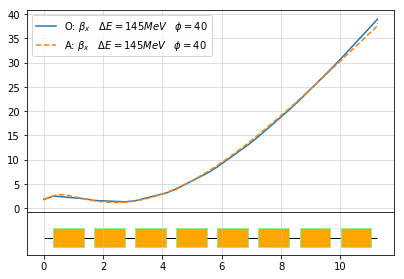

In [23]:
%matplotlib inline
import sys
sys.path.append("/Users/tomins/ownCloud/DESY/repository/ocelot")
from ocelot import *
from ocelot.common.globals import *
from injector_lattice import *
from ocelot.gui.accelerator import *
import time
from ocelot.adaptors.astra2ocelot import *

p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_40d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 41.3 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)

print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")

#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as4, bx_as4 = np.loadtxt("astra_data/phase_40d_slice_as.txt")

ax_xy.plot(s_oc, bx_oc, "-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")
ax_xy.plot(s_as4, bx_as4, "--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=40$")

ax_xy.legend()
plt.show()


### Medium chirp 20 deg

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.49086183609307  MeV
ASTRA: dE =  0.14493352101818127  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.4908618360932  MeV
OCELOT: D_sigma =  0.5530052952049079  um
ASTRA: D_sigma =  2.550714547737217  um


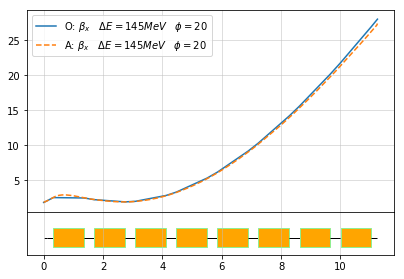

0.9909704606283686

In [24]:
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_20d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 21.3 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as3, bx_as3 = np.loadtxt("astra_data/phase_20d_slice_as.txt")

ax_xy.plot(s_oc, bx_oc, "-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")
ax_xy.plot(s_as3, bx_as3, "--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=20$")

ax_xy.legend()
plt.show()

( 151.45086206371445)/152.83085427963246

### No chirp phi = 0

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  151.5608614380449  MeV
ASTRA: dE =  0.14500352062013308  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  151.56086143804504  MeV
OCELOT: D_sigma =  0.558280507842019  um
ASTRA: D_sigma =  2.3057131364436807  um


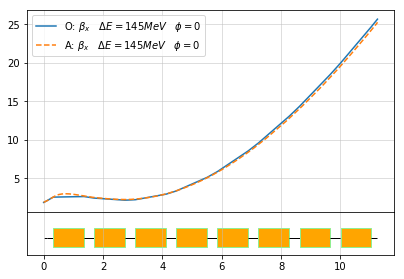

0.9829311343316508

In [25]:
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_0d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = 1.4 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as2, bx_as2 = np.loadtxt("astra_data/phase_0d_slice_as.txt")


ax_xy.plot(s_oc, bx_oc, "-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")
ax_xy.plot(s_as2, bx_as2, "--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")

ax_xy.legend()
plt.show()

151.45086206371445/154.08084734918307 

### Chirp -40 deg

d sigma =  0.0  um
ASTRA: start energy =  6.5573408179118235  MeV
ASTRA: end energy =  156.9908316426225  MeV
ASTRA: dE =  0.1504334908247107  MeV
OCELOT: start energy =  6.5573408179118235  MeV
z = 11.2484 / 11.248400000000004 : applied:  applied:  
OCELOT: end energy =  156.99083164262265  MeV
OCELOT: D_sigma =  0.5921171165888933  um
ASTRA: D_sigma =  3.037116158441305  um


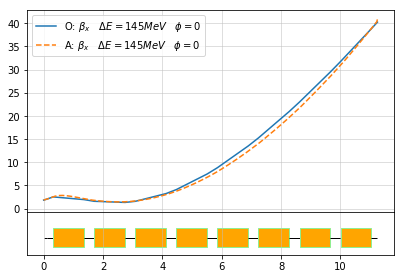

In [26]:
p_array_init = load_particle_array("astra_data/init_beam_slice.npz")
tau = p_array_init.tau()
print("d sigma = ",  (np.max(tau) - np.min(tau))*1e6, " um")

p_array_end = load_particle_array("astra_data/ast_end_m40d_slice.npz")
print("ASTRA: start energy = ", p_array_init.E*1000, " MeV")
print("ASTRA: end energy = ", p_array_end.E*1000, " MeV")
dE = p_array_end.E - p_array_init.E
print("ASTRA: dE = ", dE, " MeV")


phi1 = -38.6 
V1=dE/np.cos(phi1*pi/180)/8

C_A1_1_1_I1.v = V1; C_A1_1_1_I1.phi = phi1
C_A1_1_2_I1.v = V1; C_A1_1_2_I1.phi = phi1
C_A1_1_3_I1.v = V1; C_A1_1_3_I1.phi = phi1
C_A1_1_4_I1.v = V1; C_A1_1_4_I1.phi = phi1
C_A1_1_5_I1.v = V1; C_A1_1_5_I1.phi = phi1
C_A1_1_6_I1.v = V1; C_A1_1_6_I1.phi = phi1
C_A1_1_7_I1.v = V1; C_A1_1_7_I1.phi = phi1
C_A1_1_8_I1.v = V1; C_A1_1_8_I1.phi = phi1

method = MethodTM()
method.global_method = SecondTM
lat = MagneticLattice(cell, start=start_sim, stop=stop_A1, method=method)

navi = Navigator(lat)

# deep copy of the initial beam distribution 
p_array = deepcopy(p_array_init)
start = time.time()
print("OCELOT: start energy = ", p_array.E*1000, " MeV")
tws_track, p_array = track(lat, p_array, navi)
print()
print("OCELOT: end energy = ", p_array.E*1000, " MeV")
#compare_beams(p_array, p_array_end,  legend_beam1="ocelot", legend_beam2="astra", 
#              figsize=(10, 8))

print("OCELOT: D_sigma = ", (np.max(p_array.tau()) - np.min(p_array.tau()))*1e6, " um")
print("ASTRA: D_sigma = ", (np.max(p_array_end.tau()) - np.min(p_array_end.tau()))*1e6, " um")
#tws_astra = emittance_analysis(fileprefix="Exfel", s_offset = 0, trace_space=True)

fig, ax_xy = plot_API(lat, legend=False)
s_oc = [tw.s for tw in tws_track]
bx_oc = [tw.beta_x for tw in tws_track]

s_as1, bx_as1 = np.loadtxt("astra_data/phase_m40d_slice_as.txt")


ax_xy.plot(s_oc, bx_oc, "-",  label= "O:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")
ax_xy.plot(s_as1, bx_as1, "--", label= "A:" + r" $\beta_{x} \quad \Delta E=145 MeV \quad \phi=0$")

ax_xy.legend()
plt.show()


